## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


In [2]:
import os
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. Load the dataset from Kaggle. Use the "hour.csv" file.

In [3]:
#!pip install xgboost

In [4]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [5]:
dataset_path = "C:/Users/Bruger/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1"

files = os.listdir(dataset_path)
file_path = dataset_path + "/" + files[1]
print(file_path)

C:/Users/Bruger/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv


In [6]:
df = pd.read_csv(file_path)

In [7]:
df = df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnhth": "month",
    "hr": "hour",
    "cnt": "bike count"
})

In [8]:
df = df.drop("instant", axis=1)

In [9]:
df['day hr'] = df["date"].astype(str) + ' ' + df['hour'].apply(lambda x: f'{x:02}:00:00')

In [10]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
#df = df.sort_index() # thinks this groups the date and calculates the sum instead, but that removes the hour column and info

In [11]:
df

,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike count,day hr
date,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


### 2. Visualize the structure of the dataset using appropriate libraries and plots.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  bike count  17379 non-null  int64  
 15  day hr      17379 non-null  object 
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [14]:
df.isna().sum()

season        0
year          0
mnth          0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
bike count    0
day hr        0
dtype: int64

In [15]:
df.duplicated().sum()

0

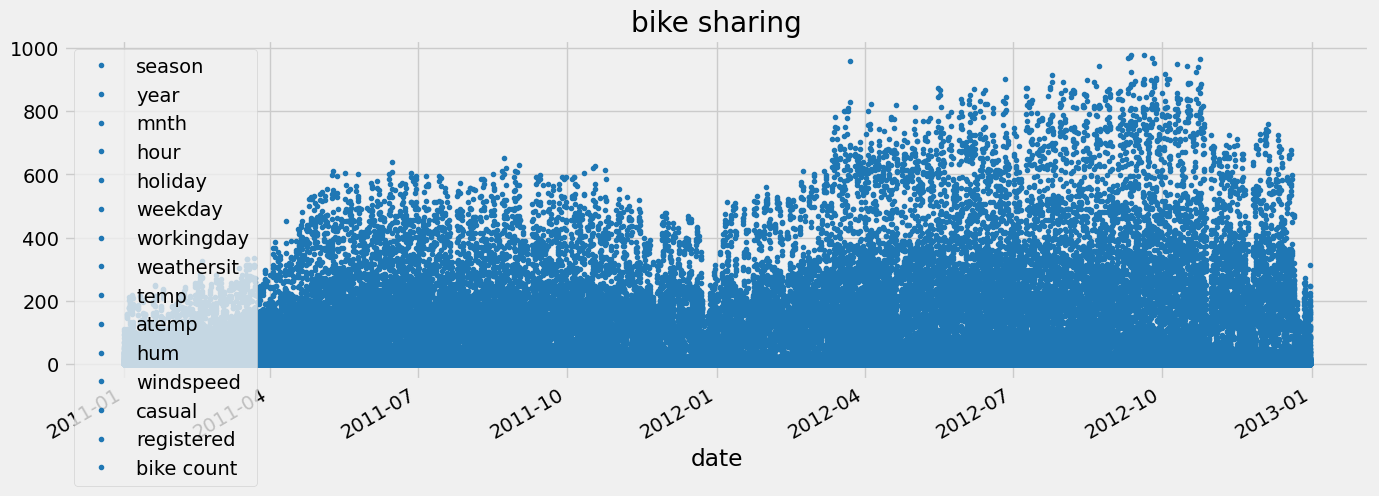

In [16]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='bike sharing')
plt.show()

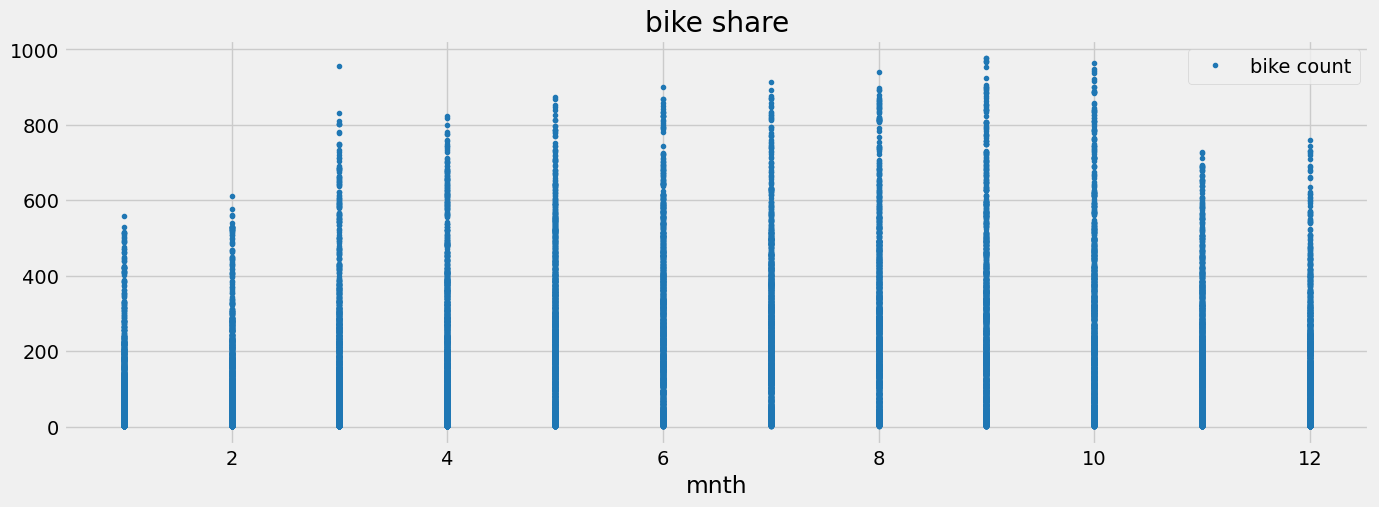

In [17]:
df.plot(style='.', x="mnth", y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

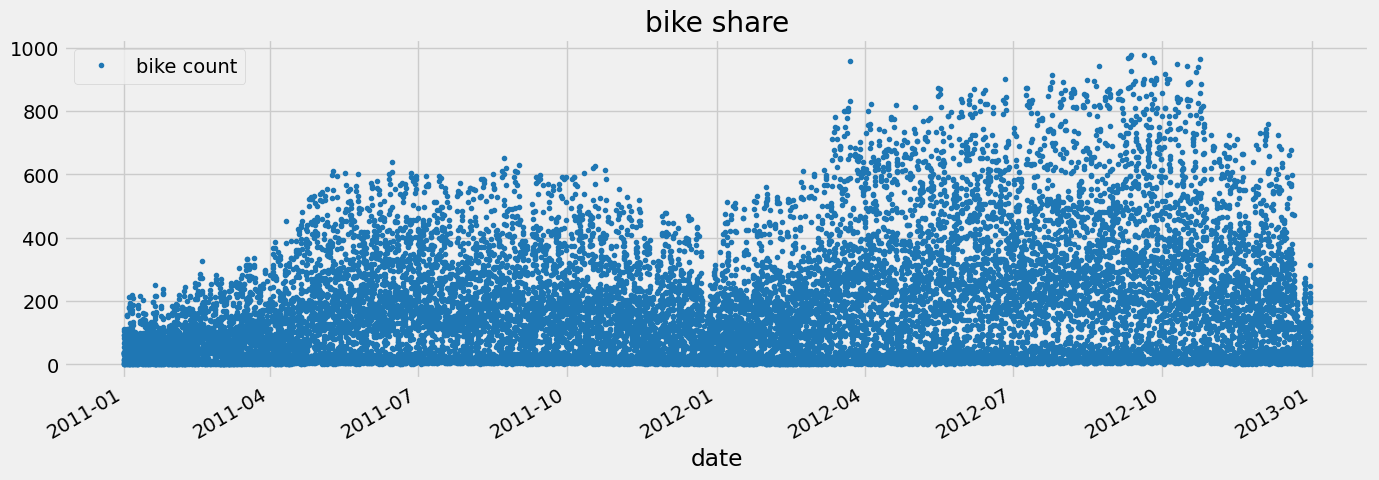

In [18]:
df.plot(style='.', y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

In [48]:
df

,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,bike count,day hr,rolling_mean_3h,rolling_mean_3d,lag_1m,lag_1w,lag_1d
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,...,0.0000,3,13,16,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,...,0.0000,8,32,40,2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,...,0.0000,5,27,32,2011-01-01 02:00:00,29.333333,NaN,NaN,NaN,NaN
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,...,0.0000,3,10,13,2011-01-01 03:00:00,28.333333,NaN,NaN,NaN,NaN
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,...,0.0000,0,1,1,2011-01-01 04:00:00,15.333333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,...,0.1642,11,108,119,2012-12-31 19:00:00,135.000000,81.763889,320.0,26.0,102.0
2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,...,0.1642,8,81,89,2012-12-31 20:00:00,110.000000,81.652778,297.0,18.0,72.0
2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,...,0.1642,7,83,90,2012-12-31 21:00:00,99.333333,81.625000,249.0,23.0,47.0


### 3. Clean and pre-process the dataset as required and prepare the data for modelling.

 ### 4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.

In [46]:
df["lag_1d"] = df["bike count"].shift(24) # shift 1 day
#df[['bike count', 'lag_1d']].head(25)

In [47]:
df["lag_1w"] = df["bike count"].shift(7*24)
#df[['bike count', 'lag_1w']].head(7*24 + 1)

In [44]:
df["lag_1m"] = df["bike count"].shift(30*24) # shift 1 month
#df[['bike count', 'lag_1m']].head(30*24 + 1)

In [21]:
df["rolling_mean_3h"] = df["bike count"].rolling(window=3).mean()

In [22]:
df["rolling_mean_3d"] = df["bike count"].rolling(window=24*3).mean()

### 5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [ ]:
# make graph of bike count for the

In [51]:
df.index.min()

Timestamp('2011-01-01 00:00:00')

In [52]:
df.index.max()

Timestamp('2012-12-31 00:00:00')

In [62]:
print(df.isna().sum())
df_no_null = df.copy().dropna()

print(df_no_null.isna().sum())

<Figure size 640x480 with 0 Axes>

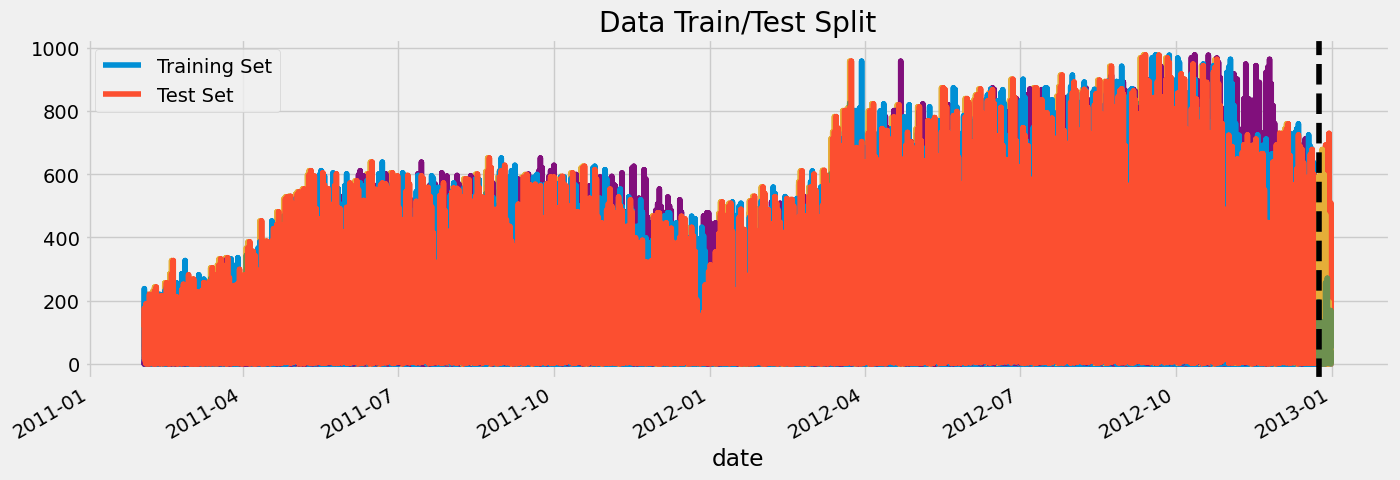

In [67]:
train = df_no_null.loc[df_no_null.index < '2012-12-24']
test = df_no_null.loc[df_no_null.index >= '2012-12-24']
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2012-12-24', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [68]:
FEATURES_LR = [
    'hour', 'mnth', "lag_1d", "lag_1w", "lag_1m"
    ]
TARGET = 'bike count'

In [69]:
X_train_lr = train[FEATURES_LR]
y_train_lr = train[TARGET]

X_test_lr = test[FEATURES_LR]
y_test_lr = test[TARGET]

In [70]:
lr = LinearRegression()

# Train the model
lr.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr.predict(X_test_lr)

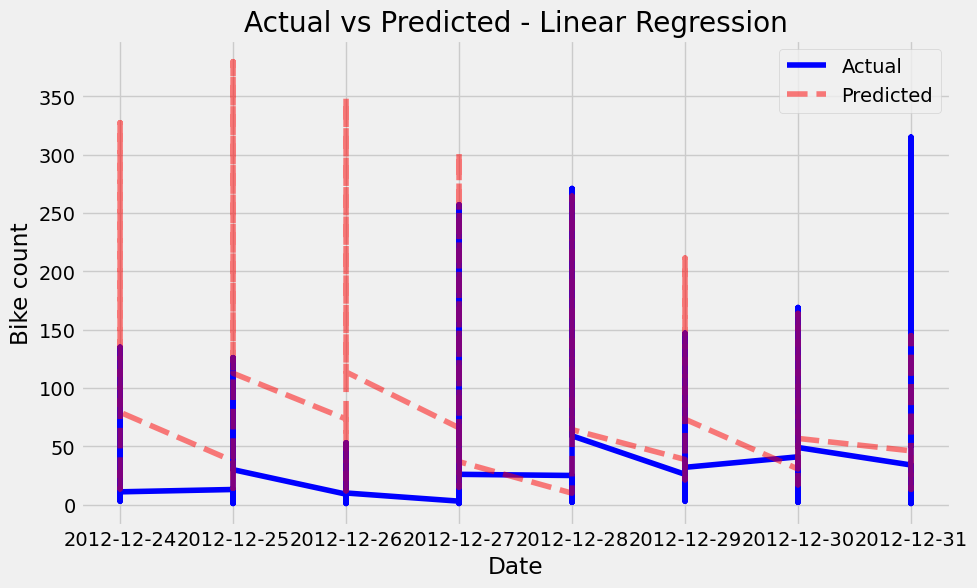

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_lr.index, y_test_lr, label='Actual', color='blue')
plt.plot(y_test_lr.index, y_pred_lr, label='Predicted', color='red', linestyle='dashed', alpha=0.5)
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Bike count')
plt.legend()
plt.show()
